In [3]:
# K-Means Clustering on Mall Customers Dataset

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [5]:
# Step 1: Load dataset
df = pd.read_csv('Mall_Customers.csv')

In [7]:
# Step 2: Preprocess data - Drop non-numeric and irrelevant columns
data = df.drop(['CustomerID', 'Gender'], axis=1)


D:\nensi\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\nensi\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\nensi\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\nensi\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. Y

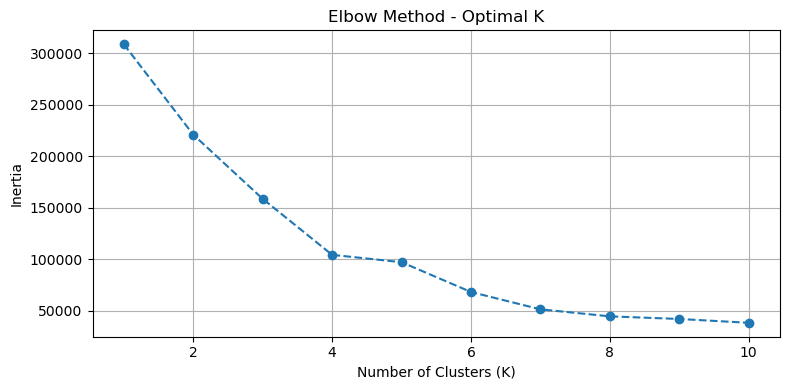

In [9]:
# Step 3: Elbow Method to find optimal K
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.title('Elbow Method - Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.tight_layout()
plt.show()

In [10]:
# Step 4: Choose optimal K based on the Elbow plot (assume 5 here)
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(data)

D:\nensi\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [11]:
# Step 5: PCA for 2D projection
pca = PCA(n_components=2)
components = pca.fit_transform(data.drop('Cluster', axis=1))
data['PCA1'] = components[:, 0]
data['PCA2'] = components[:, 1]

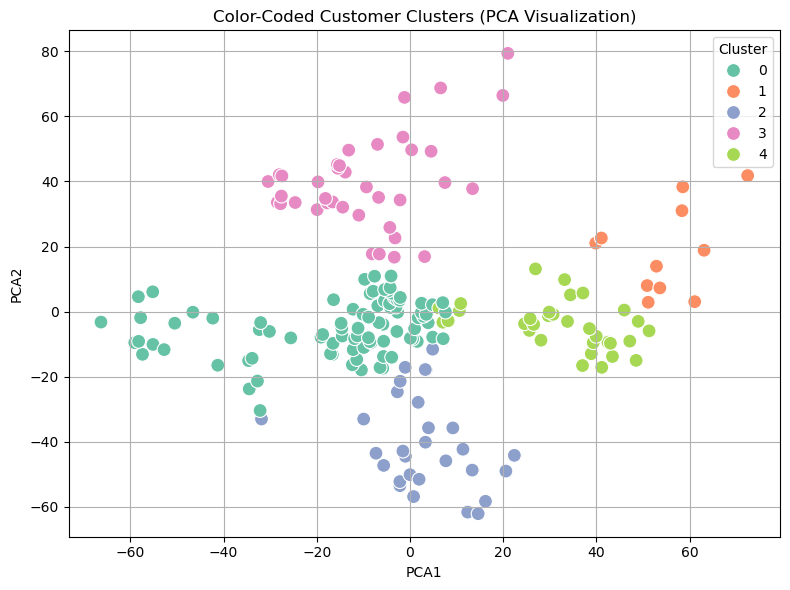

In [15]:
# Step 6: Visualize clusters with color-coding
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=100)
plt.title('Color-Coded Customer Clusters (PCA Visualization)')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()


In [17]:
# Step 7: Evaluate clustering using Silhouette Score
score = silhouette_score(data.drop(['Cluster', 'PCA1', 'PCA2'], axis=1), data['Cluster'])
print(f"Silhouette Score: {score:.3f}")

Silhouette Score: 0.358
